# Notebook Set-up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import logging
import numpy as np
import nltk
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Raw Data

In [2]:
raw_data = pd.read_csv(r'..\data\IMDB Dataset.csv')

In [3]:
raw_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Exploratory analysis

In [4]:
# Get info about the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# Check for missing values
raw_data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
# Get basic statistics
raw_data.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
# Check sentiment distribution
raw_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# Cleaning

In [8]:
# Set up basic logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [33]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, log_every=1000):
        self.log_every = log_every
        self.stop_words = set(stopwords.words("english"))
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.array([
            self._preprocess(text, idx) for idx, text in enumerate(X)
        ])

    def _preprocess(self, text, idx=None):
        if idx is not None and self.log_every and idx % self.log_every == 0:
            logging.info(f"Preprocessing row {idx}")

        text = re.sub(r"<.*?>", " ", text)
        text = re.sub(r"[^a-zA-Z]", " ", text).lower()
        tokens = text.split()
        tokens = [t for t in tokens if t not in self.stop_words]
        tokens = [self.lemmatizer.lemmatize(t) for t in tokens]
        return " ".join(tokens)

In [10]:
preprocessor = TextPreprocessor()
review_copy = raw_data['review'].copy()
cleaned_reviews = preprocessor.transform(review_copy)

# Store the cleaned reviews in a new DataFrame
cleaned_data = raw_data.copy()
cleaned_data['cleaned_review'] = cleaned_reviews


2025-06-01 13:24:01,656 - INFO - Preprocessing row 0
2025-06-01 13:24:03,797 - INFO - Preprocessing row 1000
2025-06-01 13:24:04,127 - INFO - Preprocessing row 2000
2025-06-01 13:24:04,455 - INFO - Preprocessing row 3000
2025-06-01 13:24:04,784 - INFO - Preprocessing row 4000
2025-06-01 13:24:05,116 - INFO - Preprocessing row 5000
2025-06-01 13:24:05,478 - INFO - Preprocessing row 6000
2025-06-01 13:24:05,796 - INFO - Preprocessing row 7000
2025-06-01 13:24:06,127 - INFO - Preprocessing row 8000
2025-06-01 13:24:06,449 - INFO - Preprocessing row 9000
2025-06-01 13:24:06,748 - INFO - Preprocessing row 10000
2025-06-01 13:24:07,071 - INFO - Preprocessing row 11000
2025-06-01 13:24:07,386 - INFO - Preprocessing row 12000
2025-06-01 13:24:07,684 - INFO - Preprocessing row 13000
2025-06-01 13:24:07,990 - INFO - Preprocessing row 14000
2025-06-01 13:24:08,288 - INFO - Preprocessing row 15000
2025-06-01 13:24:08,625 - INFO - Preprocessing row 16000
2025-06-01 13:24:08,947 - INFO - Preprocessi

In [11]:
cleaned_data

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...


In [12]:
# Show all duplicate rows
duplicates = cleaned_data[cleaned_data.duplicated()]
duplicates

,review,sentiment,cleaned_review
3537,Quite what the producers of this appalling ada...,negative,quite producer appalling adaptation trying imp...
3769,My favourite police series of all time turns t...,positive,favourite police series time turn tv film work...
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive,beautiful film pure cassavetes style gena rowl...
6352,If you liked the Grinch movie... go watch that...,negative,liked grinch movie go watch near good seussian...
6479,I want very much to believe that the above quo...,negative,want much believe quote specifically english s...
...,...,...,...
49912,This is an incredible piece of drama and power...,positive,incredible piece drama powerful hit found film...
49950,This was a very brief episode that appeared in...,negative,brief episode appeared one night gallery show ...
49984,Hello it is I Derrick Cannon and I welcome you...,negative,hello derrick cannon welcome first ever cannon...
49986,This movie is a disgrace to the Major League F...,negative,movie disgrace major league franchise live min...


In [13]:
cleaned_data = cleaned_data.drop_duplicates()
cleaned_data

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...


In [14]:
cleaned_data.to_pickle('cleaned_data.pkl')

In [15]:
cleaned_data = pd.read_pickle('cleaned_data.pkl')
cleaned_data

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...


# Exploratary analysis - clean version

In [16]:
# Get info about the dataset
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          49582 non-null  object
 1   sentiment       49582 non-null  object
 2   cleaned_review  49582 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [17]:
# Check for missing values
cleaned_data.isnull().sum()

review            0
sentiment         0
cleaned_review    0
dtype: int64

In [18]:
# Get basic statistics
cleaned_data.describe(include='all')

,review,sentiment,cleaned_review
count,49582,49582,49582
unique,49582,2,49573
top,No one expects the Star Trek movies to be high...,positive,imagine worst skit saturday night live mad tv ...
freq,1,24884,2


In [19]:
# Check sentiment distribution
cleaned_data['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [20]:
# Add a column that counts the number of words in the 'review' column
data_with_word_count = cleaned_data.copy()
data_with_word_count['review_word_count'] = data_with_word_count['cleaned_review'].str.split().apply(len)
data_with_word_count

,review,sentiment,cleaned_review,review_word_count
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...,162
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,86
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,84
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...,64
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,125
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...,77
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,57
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...,113
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...,112


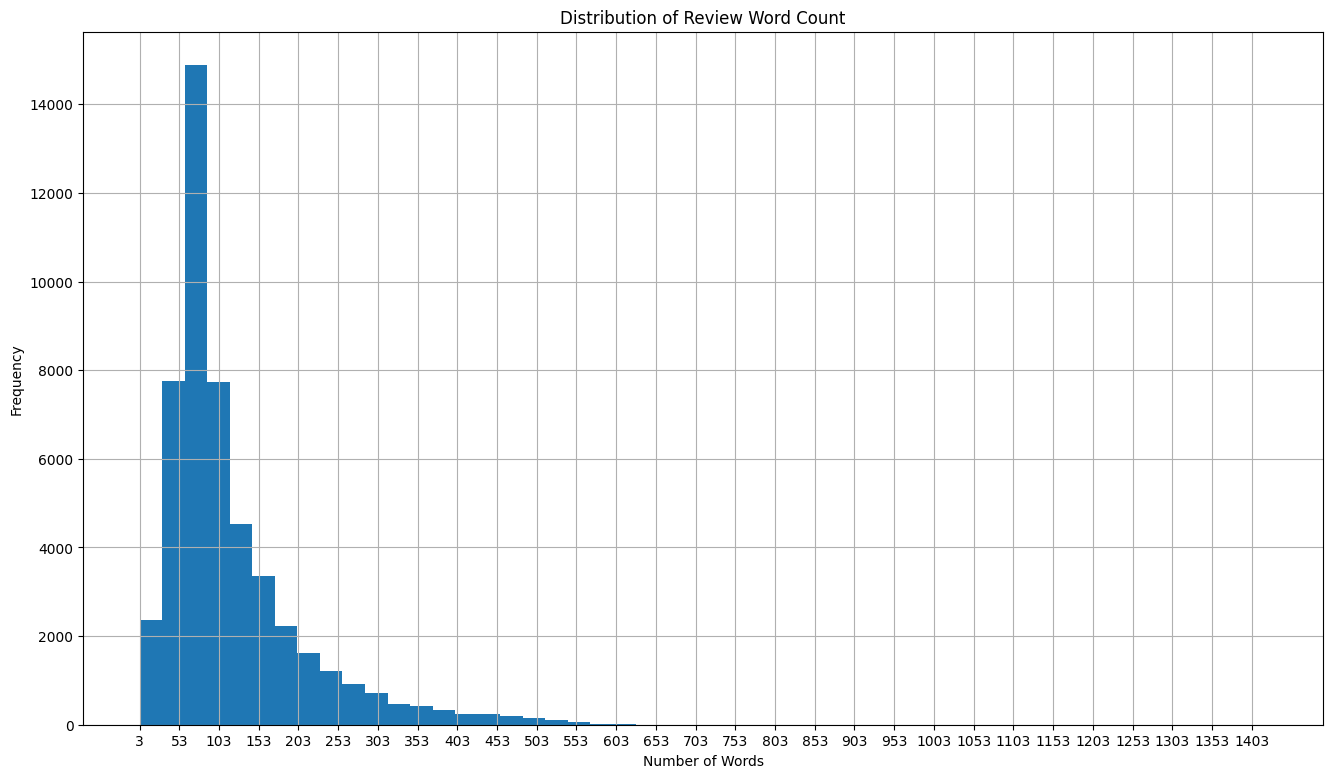

In [21]:
plt.figure(figsize=(16,9))
ax = data_with_word_count['review_word_count'].hist(bins=50)
plt.title('Distribution of Review Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xticks(
    ticks=range(
        int(data_with_word_count['review_word_count'].min()),
        int(data_with_word_count['review_word_count'].max())+1,
        50  # Set tick interval to 10, adjust as needed
    )
)
plt.show()

In [22]:
data_with_word_count['review_word_count'].describe()

count    49582.000000
mean       118.251866
std         89.495248
min          3.000000
25%         63.000000
50%         88.000000
75%        144.000000
max       1422.000000
Name: review_word_count, dtype: float64

In [23]:
# Group by review_word_count, aggregate by count, and order by count descending
review_length_distribution = (
    data_with_word_count.groupby('review_word_count')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)
review_length_distribution

,review_word_count,count
61,64,662
59,62,652
60,63,651
62,65,649
63,66,643
...,...,...
561,568,1
565,574,1
598,1135,1
599,1154,1


In [24]:
# Combine all reviews into one string, split into words
all_words = ' '.join(cleaned_data['cleaned_review']).split()

# Count frequency of each word
word_counts = Counter(all_words)

# Convert to DataFrame for easy viewing
word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
word_counts_df.head(50) # Show top 20 most common words

,word,count
272,movie,102501
282,film,92818
0,one,55037
290,like,40788
140,time,31208
365,good,29662
215,character,28126
387,story,25112
217,even,24670
113,get,24465


In [25]:
word_counts_df['count'].describe()

count     89817.000000
mean         65.279001
std         739.324357
min           1.000000
25%           1.000000
50%           2.000000
75%          12.000000
max      102501.000000
Name: count, dtype: float64

In [26]:
word_count_distribution = (
    word_counts_df.groupby('count')
    .size()
    .reset_index(name='groupby_count')
    .sort_values(by='count', ascending=False)
)
word_count_distribution

,count,groupby_count
1728,102501,1
1727,92818,1
1726,55037,1
1725,40788,1
1724,31208,1
...,...,...
4,5,2854
3,4,3884
2,3,5822
1,2,10483


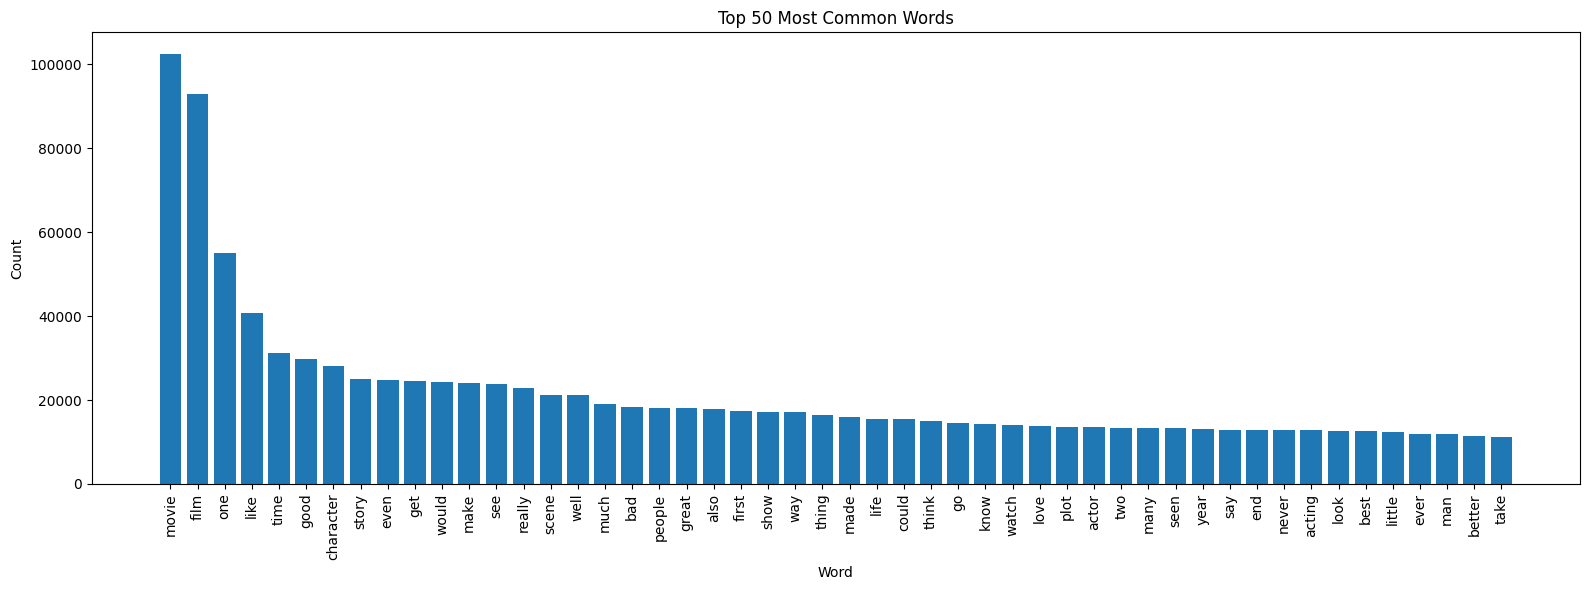

In [27]:
# Plot the top 50 most common words as a bar chart
top_50 = word_counts_df.head(50)
plt.figure(figsize=(16, 6))
plt.bar(top_50['word'], top_50['count'])
plt.title('Top 50 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

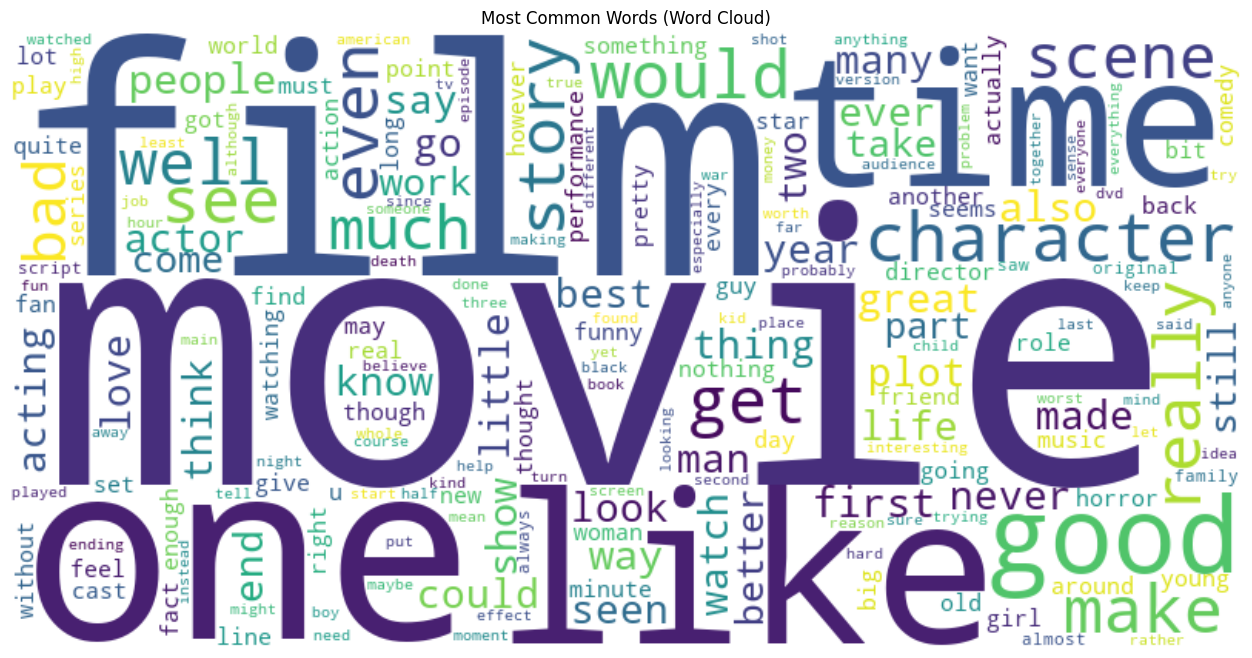

In [28]:
# Generate a word cloud for the common words
top_50_words = dict(word_counts_df.values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_50_words)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words (Word Cloud)')
plt.show()

In [29]:
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

cleaned_data_copy = cleaned_data.copy()


cleaned_data_copy["vader_sentiment_rating"] = cleaned_data_copy["cleaned_review"].apply(lambda x: sia.polarity_scores(x)["compound"])
cleaned_data_copy["vader_sentiment"] = cleaned_data_copy["vader_sentiment_rating"].apply(lambda x: "positive" if x > 0 else 'negative')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
cleaned_data_copy

,review,sentiment,cleaned_review,vader_sentiment_rating,vader_sentiment
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...,-0.9921,negative
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,0.9606,positive
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,0.9604,positive
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...,-0.9061,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,0.9887,positive
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...,0.9871,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,-0.9129,negative
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...,-0.8416,negative
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...,-0.6597,negative


In [31]:
accuracy = (cleaned_data_copy['sentiment'] == cleaned_data_copy['vader_sentiment']).mean()
print(f"Accuracy of sentiment analyzer : {accuracy:.4f}")

Accuracy of sentiment analyzer : 0.6746


In [32]:
cleaned_data

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...
